# Prerequisites to run the notebook

A basic jupyter environment is expected, along with access to simple libraries like `numpy` and `matplotlib` with `ipympl`.

**Disclaimer: Whenever trying to animate the path, restart the kernel and run only the necessary cells under that particular function. Also learning rate is a hyperparameter, that is under our control. When running into other issue, try changing the value of `lr`.**

In [1]:
%matplotlib ipympl
import numpy as np
from numpy import cos, sin, pi, exp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sys

# General Gradient descent function

This defined function can return all the points along the path to the minimum from a given starting point.
The arguments to this function are (in order):
 - The function under observation
 - A list with the starting points (in case of 1D give a list with one element as the starting point)
 - The learning rate
 - All the partial derivatives given contiguously
 
The function outputs a 2D list with all the points the gradient descent method takes.

For plotting the path, there are two funcrtions for 2D and 3D grapf=hs respectively, which sctter plot points on the gradient descent path. 

For animating the path, the list of points on the gradient descent path are passed into the update function of the `FuncAnimation` function, which animates the movement of points.

In [2]:
def grad(func, starting_point, lr, *args):
    
    # obtain and extracting the list of derivatives
    ls_deriv = []
    
    for i in args:
        ls_deriv.append(i)
    
    for i in range(len(ls_deriv)):
        for j in range(len(str(ls_deriv[i]))):
            if j>=10 and str(ls_deriv[i])[j] == ' ':
                l = j
                break
        ls_deriv[i] = str(ls_deriv[i])[10:l]
    
    base = [list(starting_point)]
    
    args = ""
    
    for i in range(len(starting_point)):
        args = args + str(starting_point[i]) + ", "
        
    args = args[:-2]
    # storing the derivative values in a list
    try:
        dum = float(args)
        deriv = [eval(f"{ls_deriv[i]}({eval(args)})") for i in range(len(ls_deriv))]
    except ValueError:
        deriv = [eval(f"{ls_deriv[i]}{eval(args)}") for i in range(len(ls_deriv))]
    except:
        print("The approached point might be a saddle point, or the curve tends to infinity.")
        sys.exit("The approached point might be a saddle point, or the curve tends to infinity.")
    
    base.append(list(np.array(base[-1]) - np.array(deriv) * lr))
    
    error = 0
    for i in range(len(starting_point)):
        error += abs(base[0][i] - base[1][i])
    
    m = 2
    
    
    while error >= 1e-5:
        args = ""
    
        for i in range(len(base[m-1])):
            args = args + str(base[m-1][i]) + ", "
        
        args = args[:-2]
        try:
            dum1 = float(args)
            deriv1 = [eval(f"{ls_deriv[i]}({eval(args)})") for i in range(len(ls_deriv))]
        except ValueError:
            deriv1 = [eval(f"{ls_deriv[i]}{eval(args)}") for i in range(len(ls_deriv))]
        except:
            print("The approached point might be a saddle point, or the curve tends to infinity.")
            sys.exit("The approached point might be a saddle point, or the curve tends to infinity.")
        
        base.append(list(np.array(base[m-1]) - np.array(deriv1) * lr))
        
        error = 0
        for i in range(len(base[m-1])):
            error += abs(base[m-1][i] - base[m][i])
        m+=1
    return base

## Plotting 2D

The function plots 2D graphs, for single varible functions. The arguments passed into this function would be the function under observation, limits of the variable as a **list** in question and the points or the path that the gradient descent.

In [3]:
def plot2D(func, limits, points):
    xs = []
    ys = []
    
    for i in range(len(points)):
        xs.append(points[i][0])
        ys.append(func(points[i][0]))

    xbase = np.linspace(limits[0], limits[1], 100)
    ybase = func(xbase)

    fig, ax = plt.subplots()
    ax.plot(xbase, ybase)

    plt.plot(xbase, ybase)
    plt.scatter(xs, ys)
    plt.scatter(xs[-1], ys[-1], color='red', s = [60])

## Plotting 3D

The function plots 3D graphs, for two varible functions. The arguments passed into this function would be the function under observation, limits of the variables as a **list** in question and the points or the path that the gradient descent.

In [4]:
def plot3D(func, limits, points):
    xs = []
    ys = []
    zs = []
    
    for i in range(len(points)):
        xs.append(points[i][0])
        ys.append(points[i][1])
        zs.append(func(points[i][0], points[i][1]))
    
    xbase = np.outer(np.linspace(limits[0][0], limits[0][1], 100), np.ones(100))
    ybase = np.outer(np.linspace(limits[1][0], limits[1][1], 100), np.ones(100)).T
    zbase = func(xbase, ybase)
    
    base = []
    base.append(xbase)
    base.append(ybase)
    base.append(zbase)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(base[0], base[1], base[2], color = 'blue', alpha = 0.3)
    ax.scatter3D(xs, ys, zs, color = 'r')
    ax.scatter3D(xs[-1], ys[-1], zs[-1], color = 'green', s=[60])

## Problem 1 - 1-D simple polynomial

We analytically or mathematically solve this function to obtain its derivative.

In [5]:
def f1(x):
    return x ** 2 + 3 * x + 8

In [6]:
def f1d(x):
    return 2*x + 3 

Calling the `grad` function wit the necessary arguments. To plot the path of the gradient descent path.

In [7]:
starting_point = 4 # the starting point
lr = 0.1 # learning_rate
xplot = [-5, 5] # specify the plotting range

The point of minimum occurs at: [-1.4999678469639786]


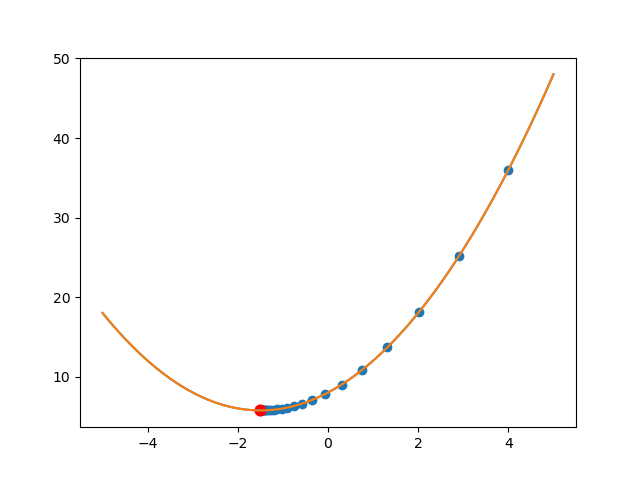

In [8]:
b = grad(f1, [starting_point], lr, f1d)

print(f"The point of minimum occurs at: {b[-1]}")

plot2D(f1, xplot, b)

## Animating the path taken by the function

In [9]:
xbase = np.linspace(xplot[0], xplot[1], 100)
ybase = f1(xbase)

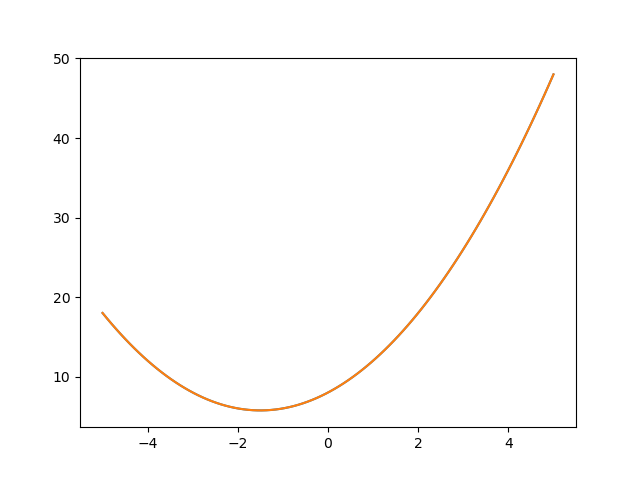

In [10]:
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

plt.plot(xbase, ybase)

def grad_desc1D(frame):
    x = b[frame][0]
    y = f1(x) # change the function here to the required function under observation
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    
ani= FuncAnimation(fig, grad_desc1D, frames=range(50), interval=1000, repeat=False)
plt.show()

In [11]:
# run this cell once the animation is done
plt.close(fig)

## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

In [12]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4


Calling the `grad` function wit the necessary arguments. To plot the path of the gradient descent path.

In [13]:
starting_point = [-10, 0] # the starting point
lr = 0.0001# learning_rate
rang = [xlim3, ylim3] # specify the plotting range

The point of minimum occurs at: [3.7630174691415528, 1.9766298983014325]


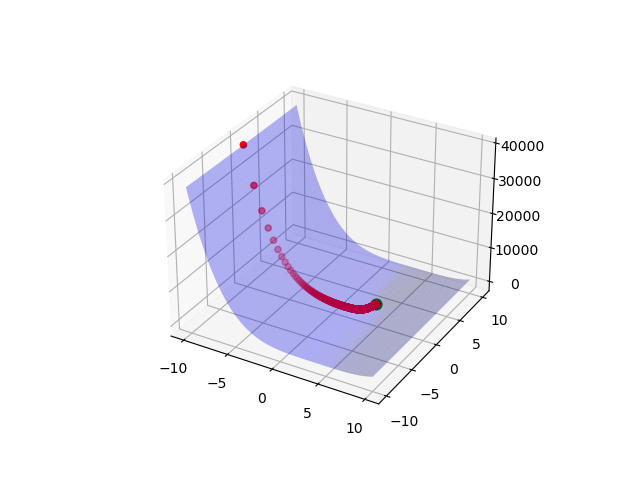

In [14]:
a = grad(f3, starting_point, lr, df3_dx, df3_dy)

print(f"The point of minimum occurs at: {a[-1]}")

plot3D(f3, rang, a)

## Animating the path taken by the function

In [15]:
xbase = np.outer(np.linspace(rang[0][0], rang[0][1], 32), np.ones(32)) 
ybase = np.outer(np.linspace(rang[1][0], rang[1][1], 32), np.ones(32)).T 
zbase = f3(xbase, ybase)

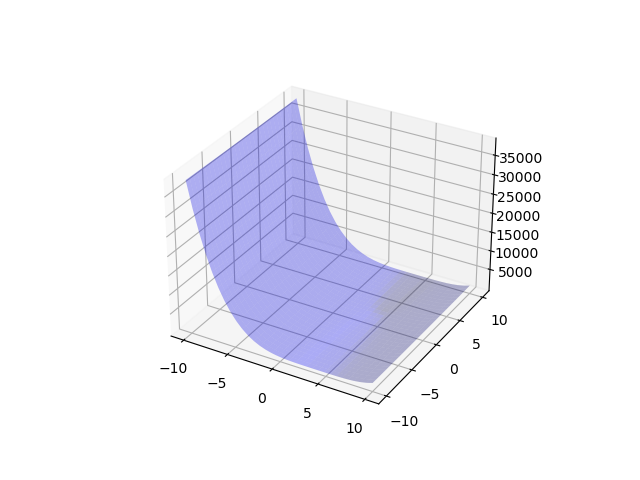

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xbase, ybase, zbase, color = 'blue', alpha = 0.3)

xall, yall, zall = [], [], []
lnall,  = ax.plot3D([], [], [], 'ro', markersize=1)
lngood, = ax.plot3D([], [], [], 'go', markersize=5)

def grad_desc2D(frame):
    x = a[frame][0]
    y = a[frame][1]
    z = f3(x, y) # change the function here to the required function under observation
    lngood.set_data_3d(x, y, z)
    xall.append(x)
    yall.append(y)
    zall.append(z)
    lnall.set_data_3d(xall, yall, zall)
    
ani= FuncAnimation(fig, grad_desc2D, frames=range(1000), interval=1000, repeat=False)
plt.show()

In [17]:
# run this cell once the animation is done
plt.close(fig)

## Problem 3 - 2-D function 

Derivatives and limits given. 

In [18]:
xlim4 = [-pi, pi]
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def f4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)


Calling the `grad` function wit the necessary arguments. To plot the path of the gradient descent path.

In [19]:
starting_point = [pi/2, pi/4] # the starting point
lr = 0.1 # learning_rate
rang = [xlim4, xlim4] # specify the plotting range

The point of minimum occurs at: [-1.5706753742776527, -1.5707018899232223]


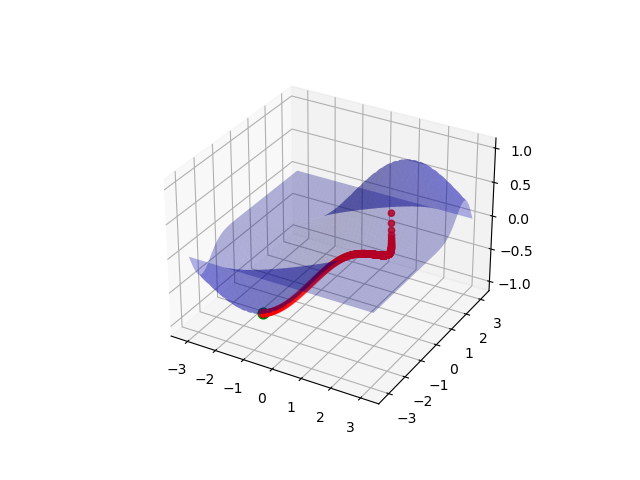

In [20]:
a = grad(f4, starting_point, lr, f4_dx, f4_dy)

print(f"The point of minimum occurs at: {a[-1]}")

plot3D(f4, rang, a)

In [21]:
xbase = np.outer(np.linspace(rang[0][0], rang[0][1], 32), np.ones(32)) 
ybase = np.outer(np.linspace(rang[1][0], rang[1][1], 32), np.ones(32)).T 
zbase = f4(xbase, ybase)

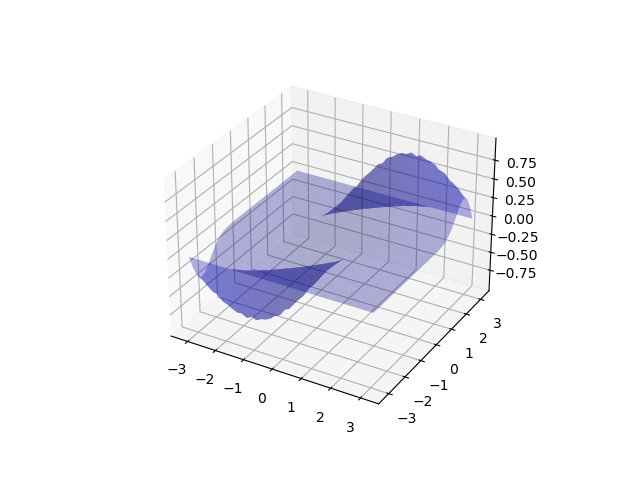

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xbase, ybase, zbase, color = 'blue', alpha = 0.3)

xall, yall, zall = [], [], []
lnall,  = ax.plot3D([], [], [], 'ro', markersize=1)
lngood, = ax.plot3D([], [], [], 'go', markersize=5)

def grad_desc2D(frame):
    x = a[frame][0]
    y = a[frame][1]
    z = f4(x, y) # change the function here to the required function under observation
    lngood.set_data_3d(x, y, z)
    xall.append(x)
    yall.append(y)
    zall.append(z)
    lnall.set_data_3d(xall, yall, zall)
    
ani= FuncAnimation(fig, grad_desc2D, frames=range(10000), interval=1000, repeat=False)
plt.show()

P.S.: This cell takes a lot of time to learn and reach the minima. Eventually it reaches the minima. This is because the starting point is such that it stays in the barren slope region for a very long time.

In [23]:
# run this cell once the animation is done
plt.close(fig)

## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi].

The derivative is analytically or mathematically calculated using basic formulae from calculus.

In [24]:
def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1

def f5d(x):
    return sin(x) * (4*cos(x)**3 - 3*sin(x)*cos(x) - 8*cos(x) - 1)

Calling the `grad` function wit the necessary arguments. To plot the path of the gradient descent path.

In [25]:
starting_point = 3 # the starting point
lr = 0.1 # learning_rate
rang = [0, 2*pi] # specify the plotting range

The point of minimum occurs at: [1.6622131822345687]


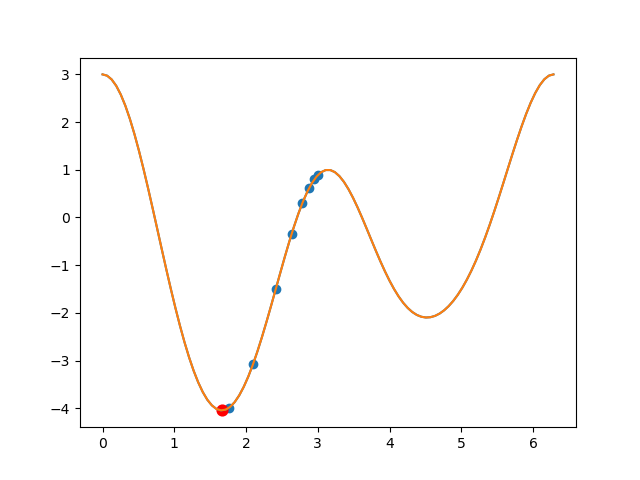

In [26]:
b = grad(f5, [starting_point], lr, f5d)

print(f"The point of minimum occurs at: {b[-1]}")

plot2D(f5, rang, b)

In [27]:
xbase = np.linspace(rang[0], rang[1], 100)
ybase = f5(xbase)

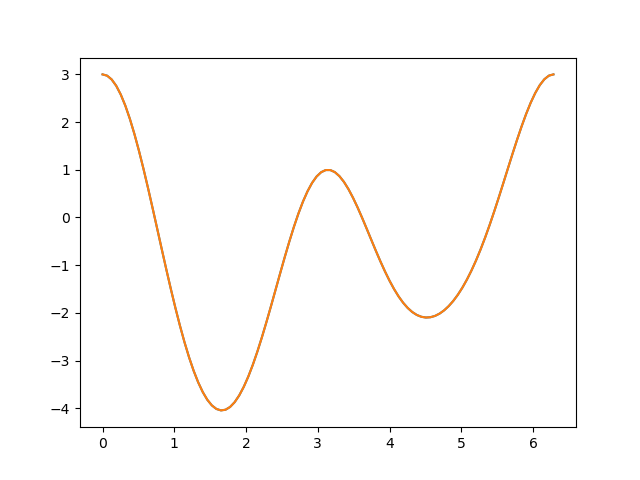

In [28]:
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

plt.plot(xbase, ybase) 

def grad_desc1D(frame):
    x = b[frame][0]
    y = f5(x) # change the function here to the required function under observation
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    
ani= FuncAnimation(fig, grad_desc1D, frames=range(50), interval=1000, repeat=False)
plt.show()

In [29]:
# run this cell once the animation is done
plt.close(fig)